# 01 - Neural Network Regression with TensorFlow

**Content of this notebook :**
- Architecture of a regression model
- Input shapes and output shapes
    - `X`: features/data (inputs)
    - `y`: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
    - Creating a model
    - Compiling a model
        - Defining a loss function
        - Setting up an optimizer
        - Creating evaluation metrics
    - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
    - Visualizing the model 
    - Looking at training curves
    - Compare predictions to ground truth
- Saving a model
- Loading a model

In [1]:
# import tensorfow
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
#  import numpy 
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

## What is a regression problem?

There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

For example, we might want to:
- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms...).
- Predict coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

## Typical architecture of a regression neural network

The word typical is on purpose. Why?

Because there are many different ways to write neural networks. But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.

| **Hyperparameter** | **Typical Value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for #bedrooms, #bathrooms, #car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually ReLU (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | MSE (mean squar error) or MAE (mean absolute error) ... |
| Optimizer | SGD (stochastic gradient descent), Adam ... |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

> **Note**: A **hyperparamter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own.

## Creating data to view and fit

Since we're working on a **regression problem** (predicting a number) let's create some linear data to model.

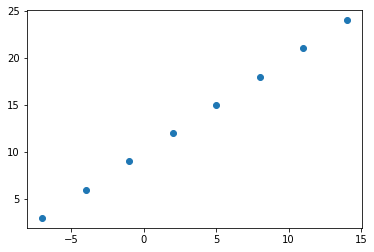

In [3]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y)

Before we do any modelling, can we calculate the pattern between `X` and `y` ?

For example, based on this data what the `y` value if `X` is 17.0? Or if `X` is -10.?

### Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

- The **input shape** is the shape of your data that goes into the model.
- The **output shape** is the shape of your data we want to come out of the model.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before we created data using NumPy arrays, but we could do the same with tensors.

In [4]:
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

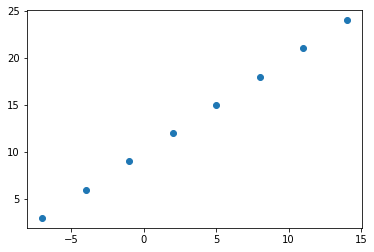

In [5]:
# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize it
plt.scatter(X,y)

Our goal here will be to use `X` to predict `y`. So our **input** will be `X` and our **output** will be `y`.

What is the shape of our input and output?

In [6]:
# Take a single example of X
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [7]:
# Single example of our dataset
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

Our dataset is only 2 small lists of numbers, so each example is a scalar with a rank 0.

In our case, we're trying to build a model to predict the pattern between `X[0]` equalling `-7.0` and `y[0]` equalling `-3.0`. We are trying to use one X value to predict one y value.

<center><img src="images/01-input-and-output-shapes-housing-prices.png" width=600px></center>

*If you were working on building a machine learning algorithm for predicting housing prices, your inputs may be number of bedrooms, number of bathrooms and number of garages, giving you an input shape of 3 (3 different features). And since you're trying to predict the price of the house, your output shape would be 1.*

## Steps in modelling with TensorFlow

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learninng).
2. **Compiling a model** - defining how a model performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3 **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

Let's see these in action using the `Keras Sequential API` to build a model for our regression data.

> **Note**: if you're using TensorFlow 2.7.0+, the `fit()` function no longer upscales input data to go from `(batch_size,)` to `(batch_size,1)`. To fix this, we need to expand the dimension of input data using `tf.expand_dims(input_data,axis=-1)`.

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae -> Mean Absolute error
              optimizer = tf.keras.optimizers.SGD(), # SQG is short for stochastic gradient descent
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 282ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748


In [9]:
# Other way to write the model

# Set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 253ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
# Check out X and y
X,y 

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Try and make a prediction using the model
y_pred = model.predict([17.])
y_pred

array([[12.716021]], dtype=float32)

It doesn't go very well for the prediction. IT should've output something close to 27.0.

## Improving a model

How can we improve the model?

To improve the model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - Here you might want to add more layers, increase the number of hidden units within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want te choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** or on more data.

<center><img src="images/02-improving-a-model-from-model-perspective.png" width=650px></center>

In [12]:
# Add more epochs to our model

tf.random.set_seed(42)

# create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# fit
model.fit(tf.expand_dims(X,axis=-1),y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 228ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 3m

We notice the loss value decrease from before (and keep decreasing as the number of epochs get higher).

In [13]:
# Make a new prediction with the new model
y_pred = model.predict([17.0])
y_pred

array([[30.158512]], dtype=float32)

The result is much better. Now we need to evaluate the model.

### Exercice : Try other changes to improve the model

In [14]:
# Add more layers to the model and see if the prediction is improved
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 271ms/step - loss: 12.3203 - mae: 12.3203
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.1611 - mae: 11.1611
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 9.9503 - mae: 9.9503
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 8.6481 - mae: 8.6481
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 7.2624 - mae: 7.2624
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 7.2141 - mae: 7.2141
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 7.1656 - mae: 7.1656
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.1167 - mae: 7.1167
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 7.0674 - mae: 7.0674
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 7.0178 - mae: 7.0178
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 6

In [15]:
y_pred = model.predict([17.0])
y_pred

array([[14.918866]], dtype=float32)

In [16]:
# change the optimizer 

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics = ["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 219ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.0548 - mae: 11.0548
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6048 - mae: 10.6048
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1548 - mae: 10.1548
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 9.7048 - mae: 9.7048
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 9.2548 - mae: 9.2548
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 8.8048 - mae: 8.8048
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 8.3548 - mae: 8.3548
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 7.9048 - mae: 7.9048
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.4548 - mae: 7.4548
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - los

In [17]:
y_pred = model.predict([17.0])
y_pred

array([[27.401552]], dtype=float32)

In [18]:
# Let's see another change to improve our model


# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fit
model.fit(tf.expand_dims(X,axis=-1),y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 223ms/step - loss: 13.9468 - mae: 13.9468
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.2859 - mae: 13.2859
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 12.6279 - mae: 12.6279
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9702 - mae: 11.9702
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 11.3044 - mae: 11.3044
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6244 - mae: 10.6244
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 9.9248 - mae: 9.9248
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 9.1949 - mae: 9.1949
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 8.4303 - mae: 8.4303
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 7.6245 - mae: 7.6245
Epoch 11/100
1/1 [==============================] - 0s 5ms/step -

In [19]:
y_pred = model.predict([17.0])
y_pred

array([[31.941305]], dtype=float32)

As we can see making some changes on our model can improve the result. Adding more layers or training our model on more epochs improved the result on the loss of our model. We can see that changing also the optimizer by using Adam improved a lot the model with a loss close to 0.6 and a prediction close to 27.

However we can see in the examples that even if the loss is improved in some models, the result is still not close to 27. It means that maybe our model is overfitting on our training data. It is learning the patterns between X and y far too well. So when it sees a new x, it's just relating it back to what is knows and the error that it's producing during training is not a really valid representation.

Now we have trained the model, we need to evaluate it!

## Evaluating a model

When it comes to evaluation, we'll want to remember the words: "visualize, visualize, visualize." 

It's a good idea to visualize:
- **The data** - what data are you looking with? What does it look like?
- **The model itself** - what does the architecture look like? What are different shapes?
- **The training of a model** - how does a model perform while it learns?
- **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

In [20]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [21]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

### Split data into training/test set

One of the other most important steps in machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purposes:
- **Training set** - the model learns from this data, which is typically 70-80% of the total data available.
- **Validation set** - the model gets tuned on this ddata, which is typically 10-15% of the total data available.
- **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available.

For now, we'll just use a training and a test set, this means we'll have a dataset for our model to learn as well as be evaluated on.

In [22]:
# Check how many samples we have
len(X)

50

In [23]:
# Split the data into train and test sets

# train set
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

# test set
X_test = X[40:] # the last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

### Visualizing the data

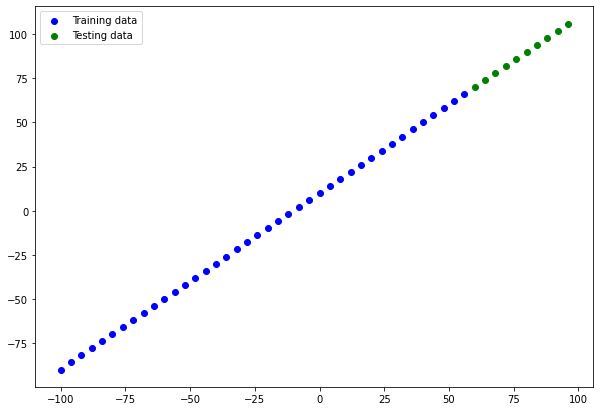

In [24]:
plt.figure(figsize=(10,7))

# plot training data in blue
plt.scatter(X_train,y_train,c="b",label="Training data")

# plot testing data in green
plt.scatter(X_test,y_test, c="g", label = "Testing data")

# show legend and the fig
plt.legend()
plt.show()


### Visualizing the model

In [50]:
# Create a model


# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [51]:
# summary

model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

The cell above errors because we haven't fit or built our model. We also haven't told it what input shape it should be expecting.

We can let our model know the input shape of our data using the `input_shape` parameter to the first layer (usually if `input_shape` isn't defined, Keras tries to figure it out automatically).

In [52]:
# Find the shape of the input
X[0].shape 

TensorShape([])

In [54]:
# Let's create a model which builds  automatically by defining the input_shape arguments
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [55]:
# Summary
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
- **Total params** - total number of parameters in the model
- **Trainable params** - these are the paramters (patterns) the model can update as it trains.
- **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already patterns from other models during transfer learning).

> **Exercice:** Try playing around with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)). How does this change the Total/Trainable params? Investigate what's causing the change.

In [56]:
# Exercice

# model 1 
model_Exercice1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

model_Exercice1.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=["mae"])

model_Exercice1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [57]:
#Exercice

# model 2
model_Exercice2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_Exercice2.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=["mae"])

model_Exercice2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 8         
                                                                 
 dense_21 (Dense)            (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


Let's fit our model to the training data

In [58]:
# Fit the model to the training data
model.fit(X_train,y_train,epochs=100, verbose=1) # verbose controls how much gets output (0 no outputs, 1 default output)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - l

In [41]:
#pip install pydot
#pip install graphviz

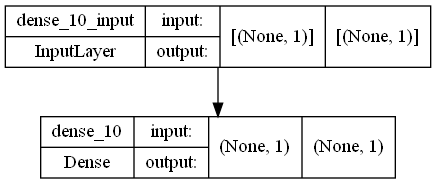

In [42]:
# from tensorflow.keras.utils import plot_model
# plot_model(model=model,show_shapes=True)

### Visualizing the predictions

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

In [59]:
# Make som predictions

y_pred = model.predict(X_test)
y_pred

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [60]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [63]:
def plot_predictions(X_train,y_train,X_test,y_test,predictions):
    """
    Plots training data, test data and the predictions

    Inputs:
    - X_train : training data features
    - y_train : training data labels
    - X_test : test data features
    - y_test : test data labels
    - predictions : predictions 
    """

    # Create a figure
    plt.figure(figsize=(10,7))

    # Plot the training data
    plt.scatter(X_train,y_train,c="b",label="Training data")

    # Plot the testing data
    plt.scatter(X_test,y_test,c="g",label="Testing data")

    # Plot the prediction
    plt.scatter(X_test, predictions, c="r", label="Predictions")

    # show the legend
    plt.legend()
    
    plt.show()



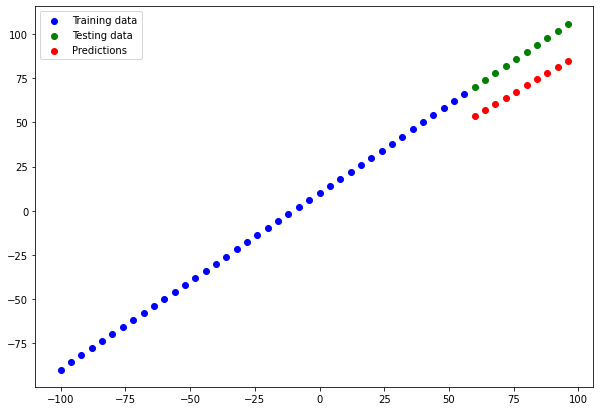

In [64]:
plot_predictions(X_train,y_train,X_test,y_test,y_pred)